In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
data = pd.read_csv('../input/water-potability/water_potability.csv')

In [3]:
data.shape

(3276, 10)

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
y = data['Potability']

In [8]:
x = data.drop('Potability', axis=1)

In [9]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


### This is my second approach
#### I will try to fill the null value using the column's median and without scaling proccess, the data will used directly for the DTC model

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imp = SimpleImputer(strategy='median')

In [12]:
imp.fit(x)

SimpleImputer(strategy='median')

In [13]:
x_filled = imp.transform(x)

In [14]:
x_filled[0]

array([7.03675210e+00, 2.04890455e+02, 2.07913190e+04, 7.30021187e+00,
       3.68516441e+02, 5.64308654e+02, 1.03797831e+01, 8.69909705e+01,
       2.96313538e+00])

#### Split the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y  = train_test_split(x_filled, y, test_size=0.2, random_state=42)

In [17]:
train_x.shape

(2620, 9)

In [18]:
test_x.shape

(656, 9)

### Models

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier(random_state=0)

In [21]:
dtc.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

### Evaluation

In [22]:
predictions = dtc.predict(test_x)

In [23]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
metric_matrix = confusion_matrix(test_y, predictions)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

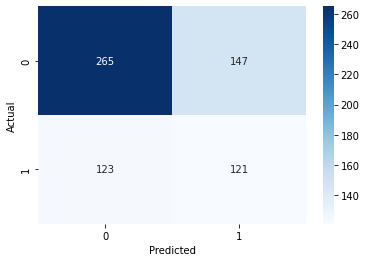

In [27]:
df_cm = pd.DataFrame(metric_matrix, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

In [28]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       412
           1       0.45      0.50      0.47       244

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.59      0.59       656



### Same data, but with Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [30]:
scl.fit(train_x)

StandardScaler()

In [31]:
train_x_scl = scl.transform(train_x)
test_x_scl = scl.transform(test_x)

In [32]:
dcl_scl = DecisionTreeClassifier(random_state=0)

In [33]:
dcl_scl.fit(train_x_scl, train_y)

DecisionTreeClassifier(random_state=0)

In [34]:
pred_scl = dcl_scl.predict(test_x_scl)

In [35]:
metric_matrix2 = confusion_matrix(test_y, pred_scl)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

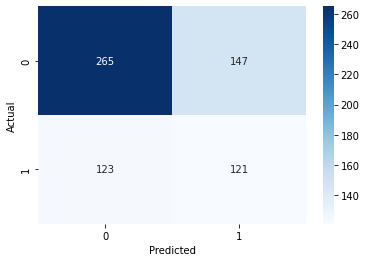

In [36]:
df_cm = pd.DataFrame(metric_matrix2, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

## To day I learned
### Tree models will always give the same result whether the data is Standardize or not.